In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("IMDB-Top-250-Movies.csv")

In [3]:
df.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [58]:
df.describe()

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


In [8]:
df.isna().sum()

rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64

### Top 5 Generos más Populares

In [5]:
real_gen = ""
for i in df['genre']:
    real_gen = real_gen+","+i

all_gen = real_gen.split(',')[1:]
unique_gen = list(set(all_gen))


data = []
for i in unique_gen:
    c = 0
    for j in df["genre"]:
        if i in j:
            c+=1
    data.append([i, c])

In [6]:
gen_df = pd.DataFrame(data, columns=['Genre', 'Freq'])
gen_df.sort_values(by = 'Freq', ascending = False, inplace = True)
gen_df = gen_df.head(5)

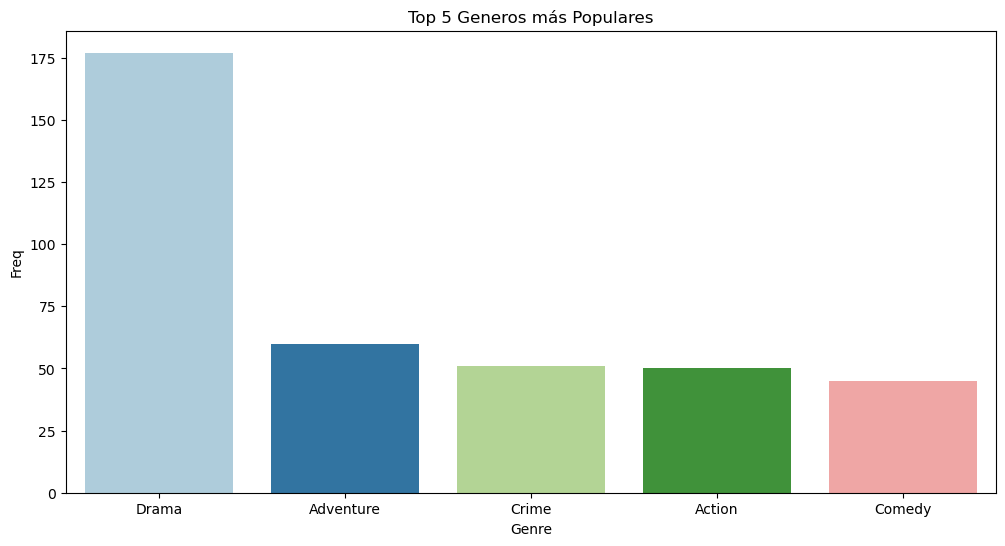

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(data=gen_df, x="Genre", y="Freq", palette="Paired")
plt.title("Top 5 Generos más Populares")
plt.show()

### Top 5 Calificaciones

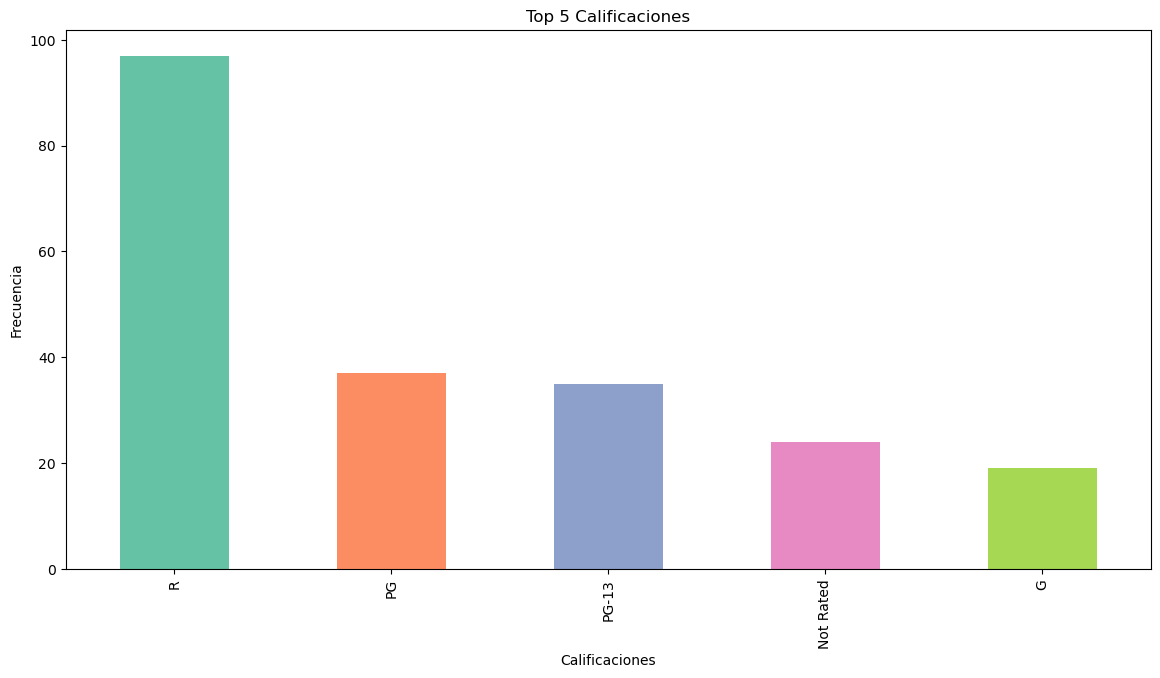

In [9]:
plt.figure(figsize=(14,7))
df.groupby('certificate').size().sort_values(ascending=False).head(5).plot(kind="bar", color= sns.color_palette('Set2'))
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.title("Top 5 Calificaciones")
plt.show()

### Top 10 Directores con más Películas

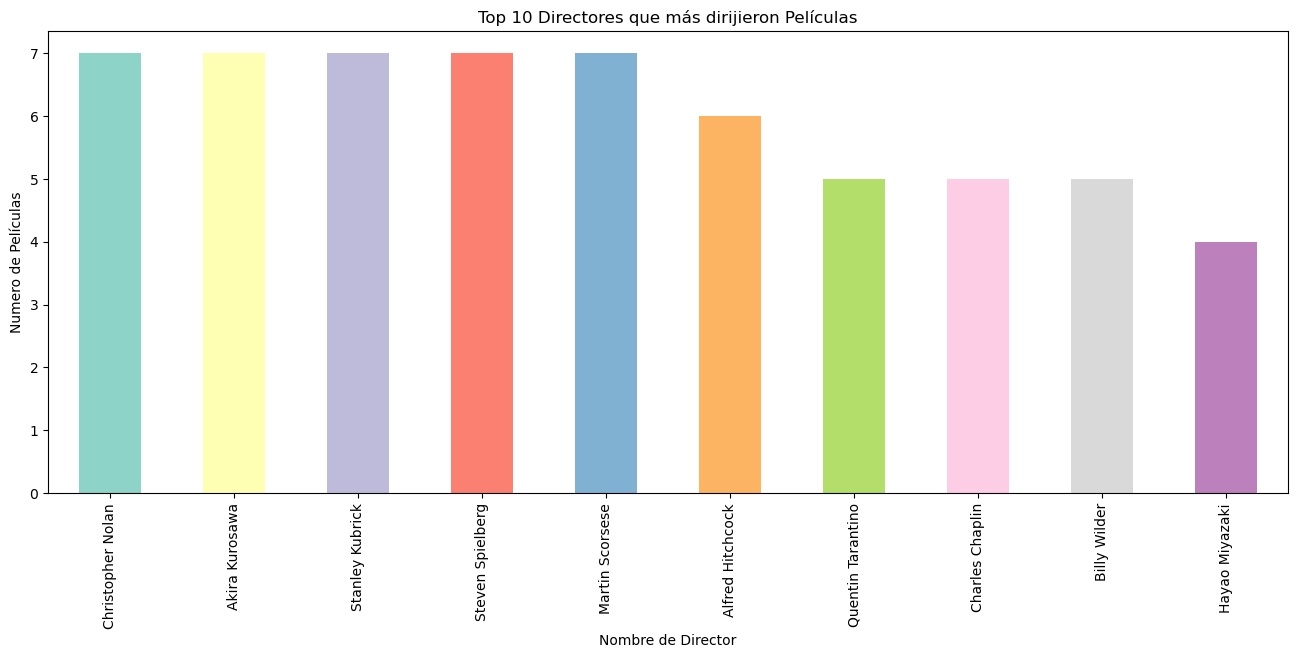

In [12]:
plt.figure(figsize=(16,6))
topdir = df.groupby('directors').size().sort_values(ascending=False).head(10).plot(kind='bar', color = sns.color_palette('Set3'))
plt.xlabel("Nombre de Director")
plt.ylabel("Numero de Películas")
plt.title("Top 10 Directores que más dirijieron Películas")
plt.show()

### Porcentaje de películas basadas en años

In [ ]:
df["year"].sort_values()

127    1921
194    1924
176    1925
186    1926
114    1927
       ... 
107    2020
129    2020
233    2021
149    2021
105    2022
Name: year, Length: 250, dtype: int64

In [8]:
_21to40 = 0
_41to60 = 0
_61to80 = 0
_81to00 = 0
_01to22 = 0

for i in df["year"]:
    if i > 1920 and i<=1940:
        _21to40+=1
    if i > 1940 and i<=1960:
        _41to60+=1
    if i > 1960 and i<=1980:
        _61to80+=1
    if i > 1980 and i<=2000:
        _81to00+=1
    else:
         _01to22+=1

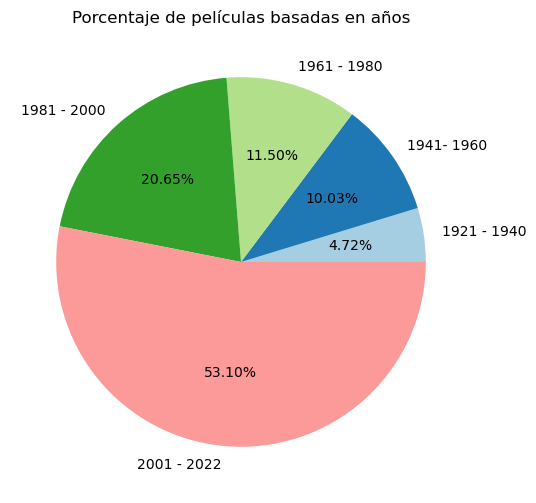

In [9]:
data= [_21to40, _41to60, _61to80, _81to00, _01to22]
label = ['1921 - 1940', '1941- 1960', '1961 - 1980', '1981 - 2000', '2001 - 2022']
plt.figure(figsize=(12,6))
plt.pie(data, labels=label, colors=sns.color_palette('Paired'), autopct='%.2f%%')
plt.title("Porcentaje de películas basadas en años")
plt.show()

### Porcentaje de rating por películas

In [10]:
_8to85 = 0
_85to9 = 0
_9to93 = 0

for i in df["rating"]:
    if i >= 8 and i <= 8.5:
        _8to85+=1
    if i >= 8.5 and i <= 9:
        _85to9+=1
    else:
        _9to93+=1

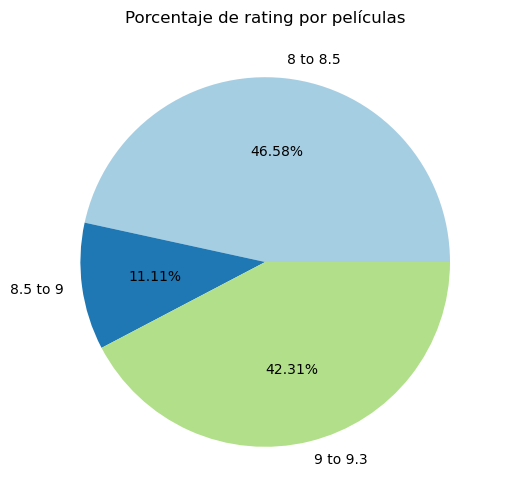

In [12]:
d = [_8to85, _85to9, _9to93]
label = ["8 to 8.5", "8.5 to 9", "9 to 9.3"]
plt.figure(figsize=(12,6))
plt.pie(d, labels=label, colors=sns.color_palette('Paired'), autopct='%.2f%%')
plt.title("Porcentaje de rating por películas")
plt.show()